In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
%matplotlib inline


rcParams['figure.figsize'] = 8, 5
COLORS = ['r', 'g', 'b', 'c', 'm', 'y', 'purple', 'lime', 'pink', 'yellow', 'orange', 'brown']

In [2]:
def plot(data, ax, title):

    for i in range(len(data)):
        ax.scatter(data[i][0], data[i][1], color=COLORS[i], alpha=0.5)
        ax.set_title(title)


def load_data(directory, num_classes, delimiter=','):
    data = []
    for i in range(1, num_classes + 1):
        d = pd.read_csv(f'{directory}/class{i}.txt', header=None, delimiter=delimiter)
        data.append(d)
        d['class'] = i - 1
    
    data.append(pd.concat(data).reset_index(drop=True))
    return tuple(data)

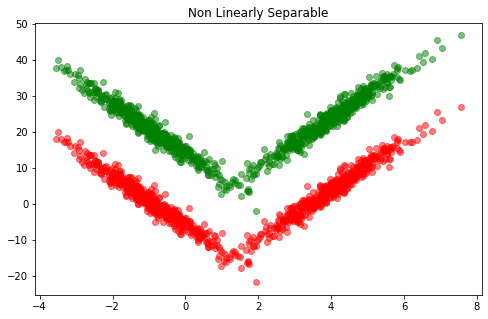

In [3]:
nls_c1, nls_c2, nls = load_data('nls_data', 2)

fig, ax = plt.subplots(1, 1, figsize=(8,5))
plot((nls_c1, nls_c2), ax, "Non Linearly Separable")

In [4]:
from sklearn.model_selection import train_test_split

def split_data(data):
    X = data.drop('class', axis = 1)
    y = data['class']
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
    x_train.reset_index(drop=True, inplace=True)
    x_test.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)
    y_test.reset_index(drop=True, inplace=True)

    x_train = x_train.to_numpy()
    x_test = x_test.to_numpy()
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()
    
    
    return (x_train, x_test, y_train, y_test)

nls_x_train, nls_x_test, nls_y_train, nls_y_test = split_data(nls)

In [5]:
class KMeans:
    def __init__(self, n_clusters=8, max_iter=300, viz=False):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.curr_iter = 0
        self.cluster_centers = None
        self.viz = viz
        
    def fit(self, X):
        # Choosing random points as cluster centers.
        indices = np.random.choice(X.shape[0], self.n_clusters)
        self.cluster_centers = np.float32(X[indices])

        cluster_assignments = self.assign_clusters(X)
        self.show_clusters(X, cluster_assignments) if self.viz else None
        
        while self.curr_iter < self.max_iter:
            self.curr_iter += 1
            # Update cluster centers using the mean of cluster points.
            self.update_centers(X, cluster_assignments)

            # Assigning new clusters based on the updated cluster centers.
            new_assignments = self.assign_clusters(X)
            
            # If no change, then break.
            flag = np.all(new_assignments == cluster_assignments)
            if (flag):
                break
            
            # Update the cluster assignments.
            cluster_assignments = new_assignments
            self.show_clusters(X, cluster_assignments) if self.viz else None
            
    def update_centers(self, X, cluster_assignments):
        for i in range(self.n_clusters):
            self.cluster_centers[i] = np.mean(X[cluster_assignments == i], axis=0)   
            
    def show_clusters(self, X, cluster_assignments):
        fig, ax = plt.subplots(1, 1)
        for i in range(self.n_clusters):
            ax.scatter(X[cluster_assignments == i, 0],
                        X[cluster_assignments == i, 1],
                        color=COLORS[i],
                        alpha=0.5)

            ax.scatter(self.cluster_centers[i][0],
                        self.cluster_centers[i][1],
                        color=COLORS[i],
                        s=300,
                        edgecolors='k')
        ax.set_title(f"Clusters after {self.curr_iter} iterations.")
        #plt.axis('equal')
        plt.show()
        
    def assign_clusters(self, X):
        cluster_assignments = None
        
        min_dist = np.array([float('inf')] * X.shape[0])
        for i in range(self.n_clusters):
            # Distance of each point from the ith cluster center.
            dist = np.sqrt(np.sum((X - self.cluster_centers[i])**2, axis=1))
            
            # Assigning ith cluster to the points where distance is lesser
            # than the previous assignment.
            cluster_assignments = np.where(dist < min_dist, i, cluster_assignments)
            
            # Updating the minimum distance for points.
            min_dist = np.where(dist < min_dist, dist, min_dist)
     
        return cluster_assignments
    
    def segment_img(self, img):
        # Convert cluster centers to pixel values.
        clusters = np.uint8(self.cluster_centers)
        # Assign cluster to each pixel.
        cluster_assignments = self.assign_clusters(img)
        # Create segmented image with cluster values as pixel values.
        segmented = clusters[np.uint8(cluster_assignments)]
        return segmented
    
    def segment_img_1(self, img):
        # Convert cluster centers to pixel values.
        clusters = np.uint8(self.cluster_centers[:, :3])
        # Assign cluster to each pixel.
        cluster_assignments = self.assign_clusters(img)
        # Create segmented image with cluster values as pixel values.
        segmented = clusters[np.uint8(cluster_assignments)]
        return segmented


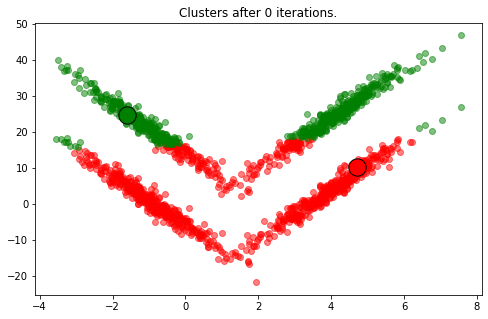

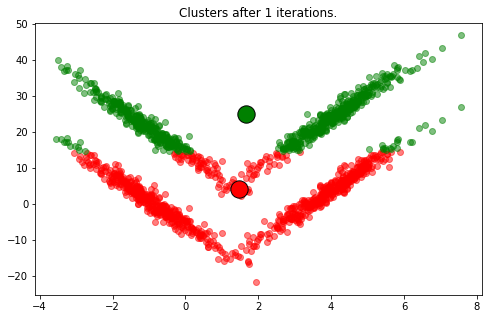

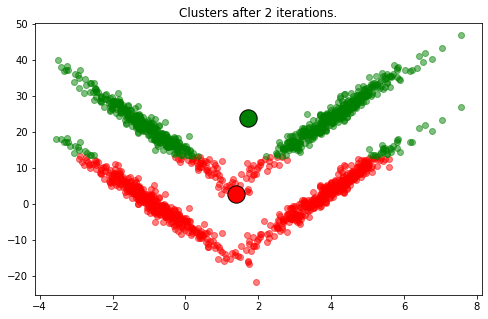

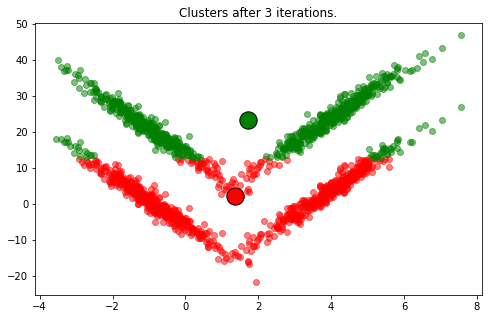

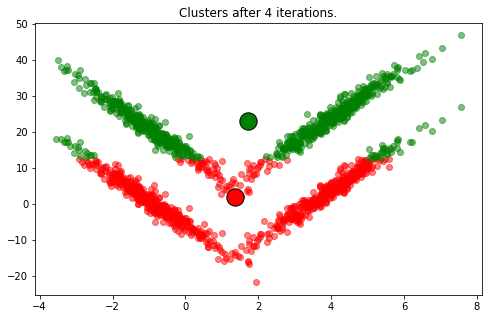

In [6]:
m1 = KMeans(2, viz=True)
m1.fit(nls_x_train)

In [7]:
from PIL import Image

raw_img = Image.open('Image.jpg')
raw_img = np.asarray(raw_img)
img = raw_img.reshape((-1,3))

In [8]:
m2 = KMeans(2, viz=False)
m2.fit(img)

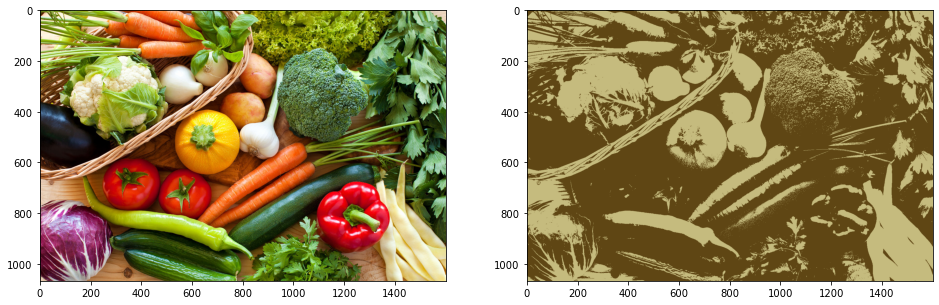

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].imshow(img.reshape((1067, 1600, 3)))
segmented1 = m2.segment_img(img).reshape((1067, 1600, 3))
ax[1].imshow(segmented1)

In [10]:
m3 = KMeans(3, viz=False)
m3.fit(img)

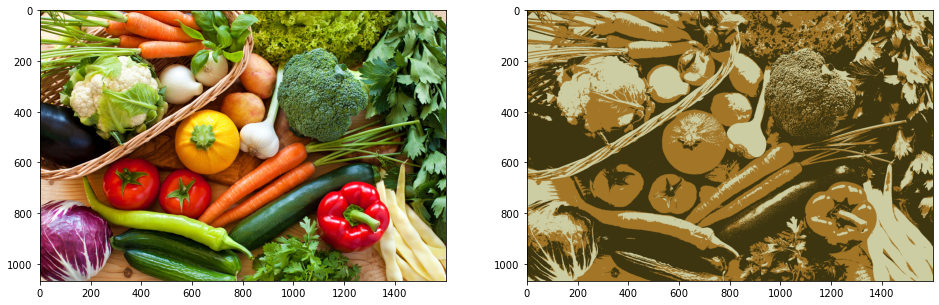

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].imshow(img.reshape((1067, 1600, 3)))
segmented2 = m3.segment_img(img).reshape((1067, 1600, 3))
ax[1].imshow(segmented2)

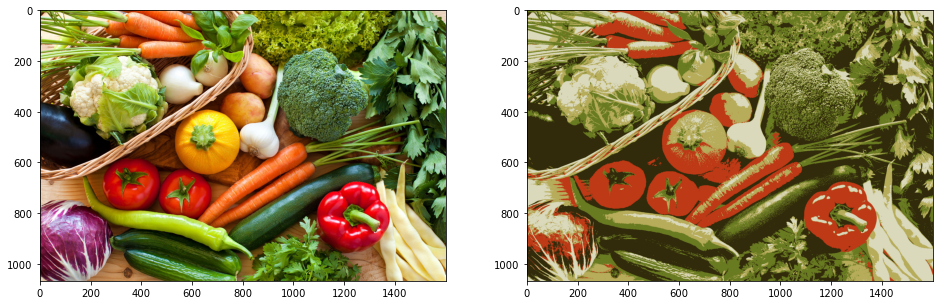

In [12]:
m4 = KMeans(5, viz=False)
m4.fit(img)

fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].imshow(img.reshape((1067, 1600, 3)))
segmented3 = m4.segment_img(img).reshape((1067, 1600, 3))
ax[1].imshow(segmented3)

In [13]:
data = np.zeros((raw_img.shape[0], raw_img.shape[1], 5))

for i in range(raw_img.shape[0]):
    for j in range(raw_img.shape[1]):
        pixel = raw_img[i][j]
        data[i][j] = np.array([pixel[0], pixel[1], pixel[2], i, j])

data = data.reshape((-1, 5))

In [14]:
m5 = KMeans(10, viz=False)
m5.fit(data)

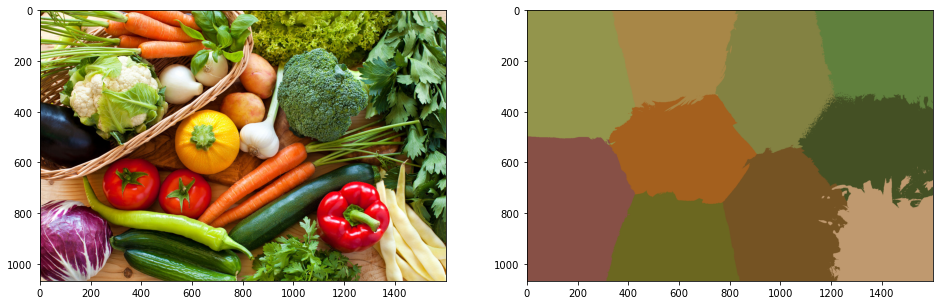

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].imshow(img.reshape((1067, 1600, 3)))
segmented1 = m5.segment_img_1(data).reshape((1067, 1600, 3))
ax[1].imshow(segmented1)